### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-06-bis/single/kerling/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241206$25^RELAXED IN PB$25^not relaxed in PB$25^Relaxed + KP 0.02$25^Relaxed + KP 0.04$single.txt
20241206$25^RELAXED IN AA$25^NOT RELAXED IN AA$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, sep="\t")
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
1,2,3973.4,30.2,0.797,6.050000e+09,-2.450000e-08,0.00848,0.232,20.1,0.862,57.5,0.000029,42.923,0.914,230.0,RELAXED IN PB
2,3,4999.6,30.3,0.818,4.950000e+09,3.310000e-07,0.01250,0.264,18.1,0.859,48.0,0.000030,59.451,0.948,190.0,RELAXED IN PB
3,4,5873.1,30.0,0.990,5.050000e+09,3.690000e-06,0.01610,0.934,20.8,1.500,48.6,0.000035,56.304,1.380,234.0,RELAXED IN PB
4,5,2468.3,30.7,0.418,5.190000e+09,0.000000e+00,0.00654,0.294,27.4,0.914,59.2,0.000021,59.511,0.507,205.0,RELAXED IN PB
5,6,3119.7,30.2,0.530,5.130000e+09,2.450000e-08,0.00861,0.232,18.4,0.861,50.6,0.000020,57.867,0.694,223.0,RELAXED IN PB


## Helper Functions

Statistical significance between Relaxed + KP 0.02 and NOT RELAXED IN AA: p = 0.0188


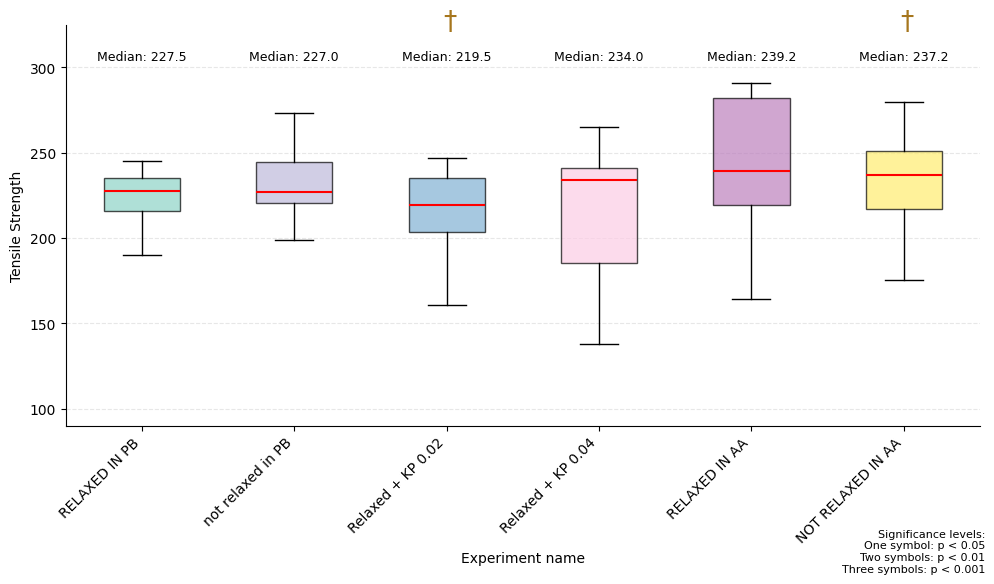

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for RELAXED IN PB: 227.5
Median TENSILE_STRENGTH for not relaxed in PB: 227.0
Median TENSILE_STRENGTH for Relaxed + KP 0.02: 219.5
Median TENSILE_STRENGTH for Relaxed + KP 0.04: 234.0
Median TENSILE_STRENGTH for RELAXED IN AA: 239.2
Median TENSILE_STRENGTH for NOT RELAXED IN AA: 237.2


In [9]:
len(df_merged)

144

Statistical significance between not relaxed in PB and Relaxed + KP 0.02: p = 0.0211
Statistical significance between Relaxed + KP 0.02 and NOT RELAXED IN AA: p = 0.0331


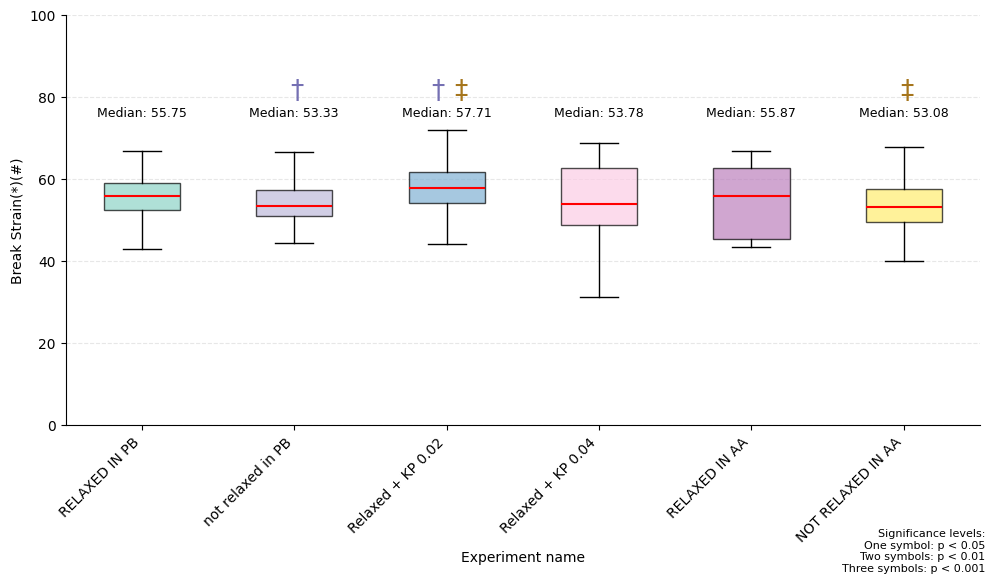

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

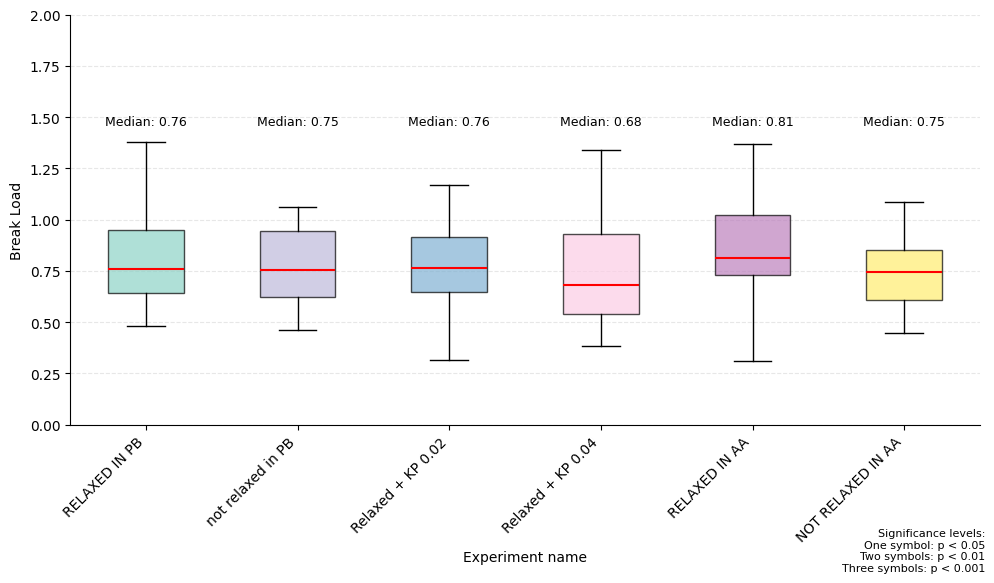

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()